# Aakash Tirathdas

## Research question/interests

**To what degree has the COVID-19 pandemic affected the airplane industry in terms of delayed and cancelled flights, and was there an improvement of sorts over the period of the January 2020?**

I would look into this question by going over the relationship between the flights delayed and cancelled and its relation to the point of time within the month to see if there was any improvement of sorts. I will also compare this with the number of recored COVID-19 cases and deaths within the month.

I would do this through as several number of comparisms, some being:

- The percentage of flights delayed per day. 
    - This could be done by finding the (flights delayed within the day/total flights during the day)*100.
    
- The percentage of flights cancelled per day. 
    - This could be done by finding the (flights delayed within the day/total flights during the day)*100.
    
- The percentage of flights delayed and cancelled per week.
    - This could be done by finding the (flights delayed or cancelled within the week/total flights during the week)*100 for each week.

- The average number of flights delayed, cancelled and both depending on the day of the week. (need to do this graph)
    - For example, the average number of flights delayed on Mondays over January 2020.
 
- The number of new COVID cases and new deaths for each day within the month of January.

- The cumulative number of cases and deaths for the month of January.

---

## Imported libraries

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import os
import matplotlib.pyplot as plt

### Seaborn theme setup

In [ ]:
sns.set_theme(style="ticks",
              font_scale=1.3, # This scales the fonts slightly higher
             )

## Loaded Original data set

In [ ]:
df = pd.read_csv('../data/raw/Jan_2020_ontime.csv')
df.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,...,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
0,1,3,EV,20366,EV,N48901,4397,13930,1393007,ORD,...,GRB,1003.0,0.0,1000-1059,1117.0,0.0,0.0,0.0,174.0,NaN
1,1,3,EV,20366,EV,N16976,4401,15370,1537002,TUL,...,ORD,1027.0,0.0,1000-1059,1216.0,0.0,0.0,0.0,585.0,NaN
2,1,3,EV,20366,EV,N12167,4404,11618,1161802,EWR,...,TYS,1848.0,0.0,1800-1859,2120.0,0.0,0.0,0.0,631.0,NaN
3,1,3,EV,20366,EV,N14902,4405,10781,1078105,BTR,...,IAH,1846.0,0.0,1800-1859,2004.0,0.0,0.0,0.0,253.0,NaN
4,1,3,EV,20366,EV,N606UX,4407,14524,1452401,RIC,...,IAH,1038.0,0.0,1000-1059,1330.0,0.0,0.0,0.0,1157.0,NaN


In [ ]:
#need to convert this to a python file and import the file


weekday = {1: "Monday", 2: "Tuesday", 3: "Wednesday", 4: "Thursday", 5: "Friday", 6: "Saturday", 7: "Sunday"}


def load_and_process_airplane(path):
    df1= (
        pd.read_csv(path)
        .loc[:,["DAY_OF_MONTH","DAY_OF_WEEK","CANCELLED","DEP_DEL15","ARR_DEL15"]]
        .rename(columns={"DEP_DEL15":"Departure_Delay","ARR_DEL15":"Arrival_Delay"}) 
    )
    
    df2=(
        df1
        .assign(CANCELLED=df1['CANCELLED'].astype(bool))
        .assign(Departure_Delay=df1['Departure_Delay'].astype(bool))
        .assign(Arrival_Delay=df1['Arrival_Delay'].astype(bool))
        
        
    )
    return df2

def graph_set_1(df2):
    df2_1=df2
    df3=(df2
        .drop(columns=["DAY_OF_WEEK"])
        .groupby("DAY_OF_MONTH")[["CANCELLED","Departure_Delay","Arrival_Delay"]]
        .agg({
            "CANCELLED": "sum",
            "Departure_Delay": "sum",
            "Arrival_Delay": "sum",
            })
               
    )
    df3["total_flights"]=df2_1["DAY_OF_MONTH"].value_counts()
    df4=(df3
        .reset_index()
        .assign(perctentage_of_flights_cancelled=lambda x:x["CANCELLED"]/x["total_flights"]*100)
        .assign(perctentage_of_flights_dealyed_on_departure=lambda x:x["Departure_Delay"]/x["total_flights"]*100)
        .assign(perctentage_of_flights_dealyed_on_arrival=lambda x:x["Arrival_Delay"]/x["total_flights"]*100)
    )
    return df4

def percent(df4):
    df5=(df4
         .drop(["CANCELLED","Departure_Delay","Arrival_Delay","total_flights"],axis=1)    
    )
    return df5

def weekly(df2):
    df2_1=df2
    df6=(df2
        .drop(columns=["DAY_OF_MONTH"])
        .groupby("DAY_OF_WEEK")[["CANCELLED","Departure_Delay","Arrival_Delay"]]
        .agg({
            "CANCELLED": "sum",
            "Departure_Delay": "sum",
            "Arrival_Delay": "sum",
        })  
    )
    df6["total_flights"]=df2_1["DAY_OF_WEEK"].value_counts()
    df7=(df6
        .reset_index()
        .assign(perctentage_of_flights_cancelled=lambda x:x["CANCELLED"]/x["total_flights"]*100)
        .assign(perctentage_of_flights_dealyed_on_departure=lambda x:x["Departure_Delay"]/x["total_flights"]*100)
        .assign(perctentage_of_flights_dealyed_on_arrival=lambda x:x["Arrival_Delay"]/x["total_flights"]*100)
        .drop(["CANCELLED","Departure_Delay","Arrival_Delay","total_flights"],axis=1)
        
    )
    df7["DAY_OF_WEEK"]=df7["DAY_OF_WEEK"].map(weekday)
    print(df7)
    df8=df7.melt(id_vars=["DAY_OF_WEEK"], var_name="days",value_name="flights %")
    return df8

In [ ]:
# data set for covid
def covid_load(path):
    dfc1 = (pd.read_csv(path)
        .query('Date_reported >= "2020-01-01" & Date_reported < "2020-02-01"')
        .assign(Country = lambda x: np.where(x.Country_code == 'US', 'United States', x.Country))
        .drop(columns=['WHO_region'])
           
       )
    dfc1["Date_reported"]=pd.to_datetime(dfc1["Date_reported"])
    dfc1["Date_reported"]=dfc1["Date_reported"].dt.day
    return dfc1
def data_process_1(dfc1):
    dfc2=(dfc1
        .groupby("Date_reported")[["New_cases","New_deaths"]]
        .agg({
            "New_cases": "sum",
            "New_deaths": "sum",
        })
        .reset_index()
        )
    
    return dfc2

def data_process_2(dfc1):
    dfc3=(dfc1
        .groupby("Date_reported")[["Cumulative_cases","Cumulative_deaths"]]
        .agg({
            "Cumulative_cases": "sum",
            "Cumulative_deaths": "sum",
        })
        .reset_index()
        )
    return dfc3

## Graphs on flight Delays and Cancellations 

In [ ]:
df2=load_and_process_airplane('../data/raw/Jan_2020_ontime.csv')
df3=graph_set_1(df2)
df3.head()

,DAY_OF_MONTH,CANCELLED,Departure_Delay,Arrival_Delay,total_flights,perctentage_of_flights_cancelled,perctentage_of_flights_dealyed_on_departure,perctentage_of_flights_dealyed_on_arrival
0,1,121,2550,2395,18114,0.667992,14.077509,13.221817
1,2,89,3034,2924,20612,0.431787,14.719581,14.185911
2,3,92,4050,4061,20616,0.446255,19.644936,19.698293
3,4,60,4342,4598,18099,0.331510,23.990276,25.404718
4,5,78,3714,3355,20632,0.378054,18.001163,16.261148


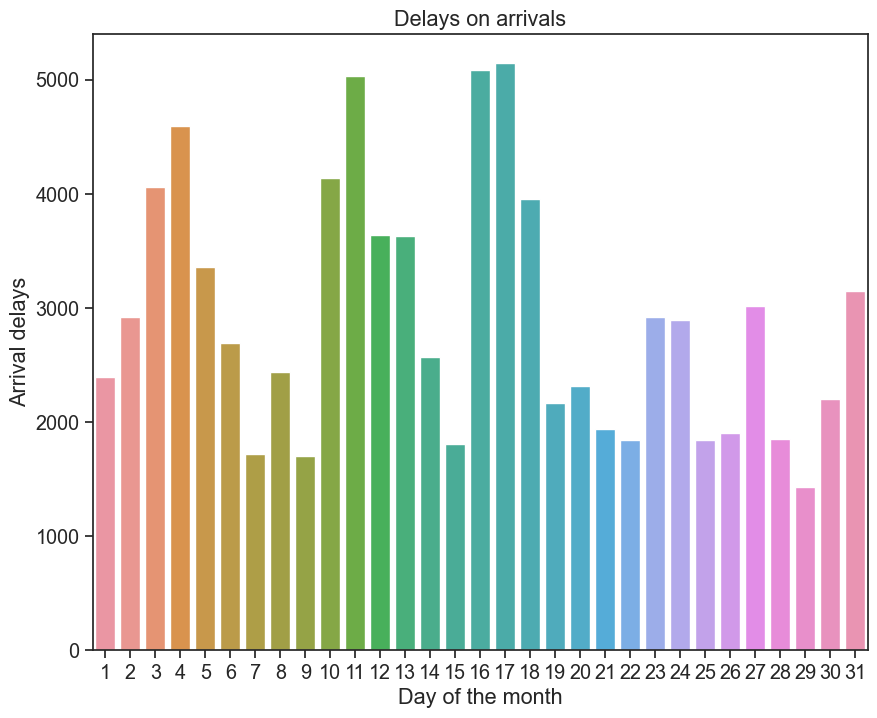

In [ ]:
plt.figure(figsize=(10, 8))
ax_daily_arrival=sns.barplot(data=df3, x="DAY_OF_MONTH", y="Arrival_Delay")
ax_daily_arrival.set(title="Delays on arrivals", xlabel="Day of the month", ylabel="Arrival delays");

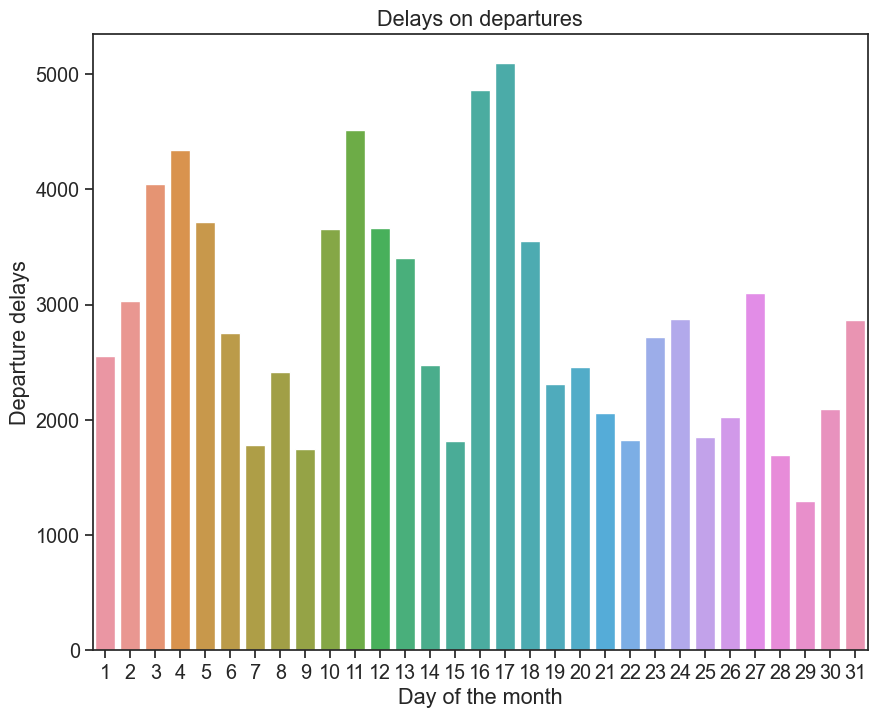

In [ ]:
plt.figure(figsize=(10, 8))
ax_daily_departure=sns.barplot(data=df3, x="DAY_OF_MONTH", y="Departure_Delay")
ax_daily_departure.set(title="Delays on departures", xlabel="Day of the month", ylabel="Departure delays");

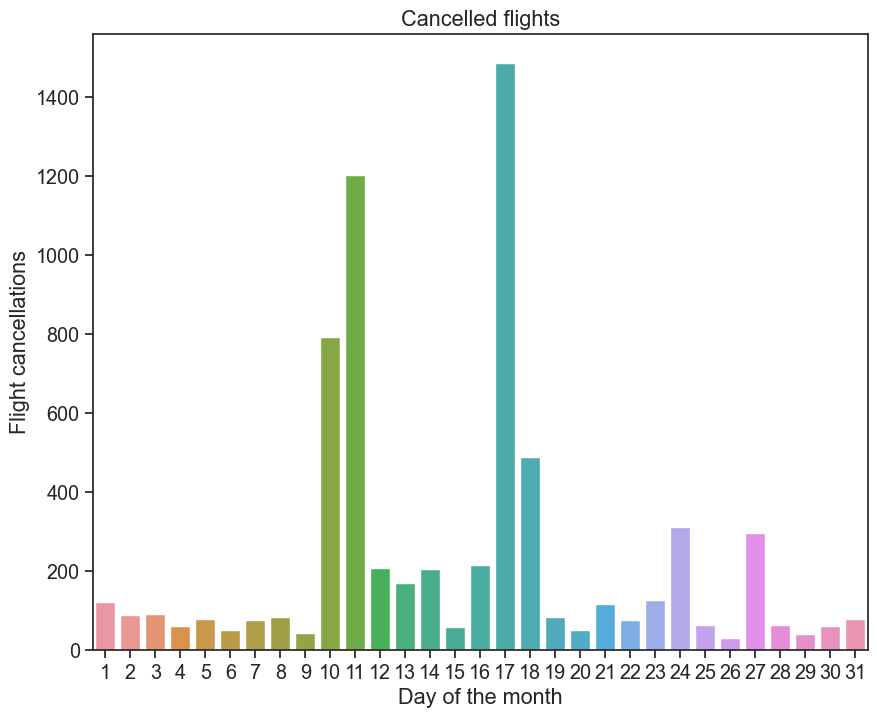

In [ ]:
plt.figure(figsize=(10, 8))
ax_daily_cancelled=sns.barplot(df3, x="DAY_OF_MONTH", y="CANCELLED")
ax_daily_cancelled.set(title="Cancelled flights", xlabel="Day of the month", ylabel="Flight cancellations");

## Graphs on New Deaths and Covid Cases

In [ ]:
df_c1=covid_load('../data/raw/WHO-COVID-19-global-data.csv')
df_c2=data_process_1(df_c1)
df_c2.head()

,Date_reported,New_cases,New_deaths
0,3,0,0
1,4,3,0
2,5,0,0
3,6,3,0
4,7,0,0


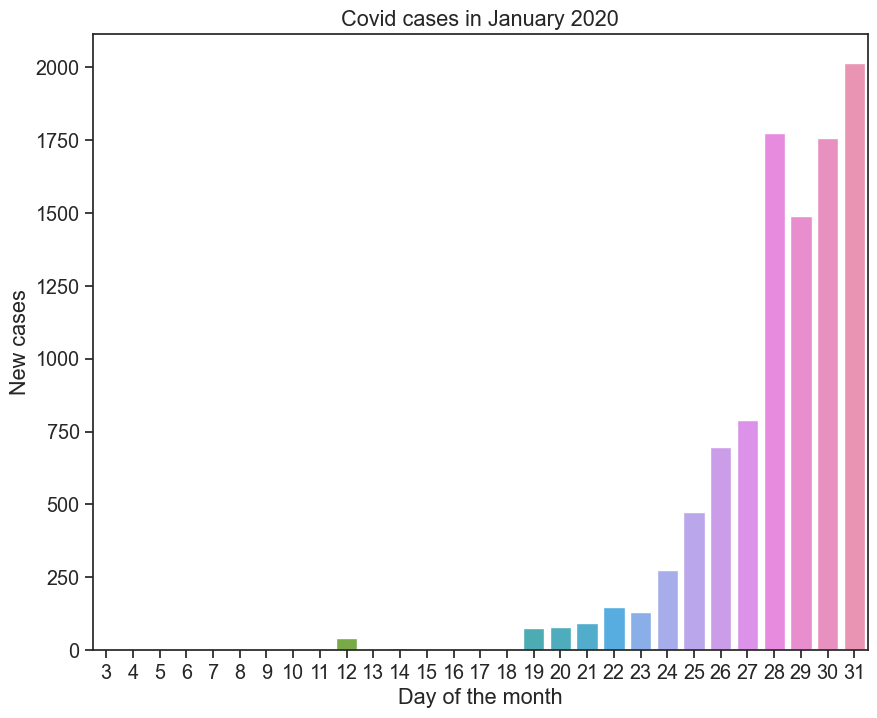

In [ ]:
plt.figure(figsize=(10, 8))
ax_daily_cases=sns.barplot(df_c2, x="Date_reported", y="New_cases")
ax_daily_cases.set(title="Covid cases in January 2020", xlabel="Day of the month", ylabel="New cases");

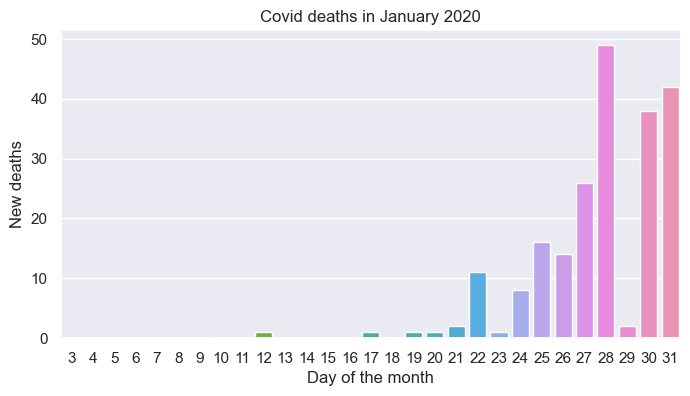

In [ ]:
plt.figure(figsize=(8, 4))
ax_daily_deaths=sns.barplot(df_c2, x="Date_reported", y="New_deaths")
ax_daily_deaths.set(title="Covid deaths in January 2020", xlabel="Day of the month", ylabel="New deaths");

### Covid Events and its relation to spikes in Delays and Cancellations
I am comparing all the graphs above in this section of analysis. It is safe to assume that the COVID-19 pandemic had a corelation. 

Another important thing to note is that the covid dataset starts from 3rd January 2020 and there is no data present for the 1st and 2nd of January which is represented in the graphs on the delays and cancellations. However, looking at the trend an some further research it is safe to assume there was no reported cases or deaths on the 1st and 2nd of January.

The first spike in delays in flights is seen during early January 2020 close to the 3rd. According to the website  https://www.cdc.gov/museum/timeline/covid19.html This is when China informs World Health Organisation (WHO) of 40 cases of an unknown etiology. Due to this not being considered as COVID-19 at the time it is not present on the graph. This could explain the increase in arrival and departure delays. Due to the lack of information airlines did not cancel flights this early.

The next spike in delays are witnessed around January 10th 2020. This is when the WHO introduces the phrase "2019 Novel Coronovirus". This likely increased security and awarness at several airports in the US. This spike in delays was accompanied with a spike in cacelled flights. This can be considered as teh first big impact COVID-19 had on the airplane indusrty in the US.

On the 12th of January 2020 the first death can be seen in the graph above.
However, we beleive this was in China and therefore didnt affect the US airplanes significantly.

The next big spike in delays and cancellations is around January 17th. This is when flights started screening passengers. This likely caused several delays and cancellations and is therefore directly related to the spike.


## Line Graphs showing relation between COVID and Flights

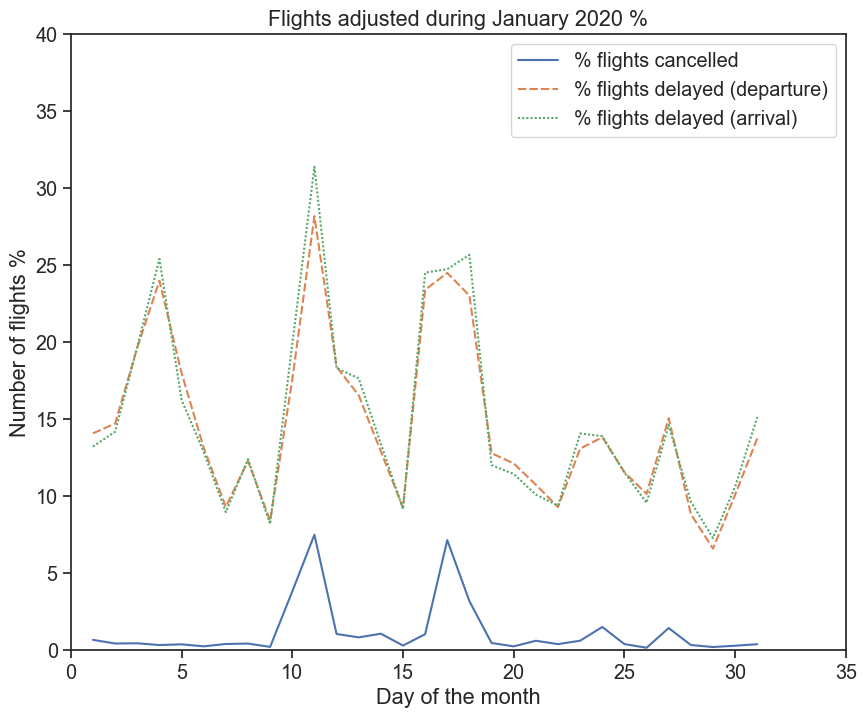

In [ ]:
df4=percent(df3)
plt.figure(figsize=(10, 8))
ax_daily_plot2=sns.lineplot(data= df4.set_index("DAY_OF_MONTH"))
ax_daily_plot2.set(title="Flights adjusted during January 2020 %", xlabel="Day of the month", ylabel="Number of flights %", xlim=(0,35),ylim=(0,40))
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper right',fontsize="small")
t = plt.legend().get_texts()
t[0].set_text('% flights cancelled')
t[1].set_text('% flights delayed (departure)')
t[2].set_text('% flights delayed (arrival)')
plt.show;

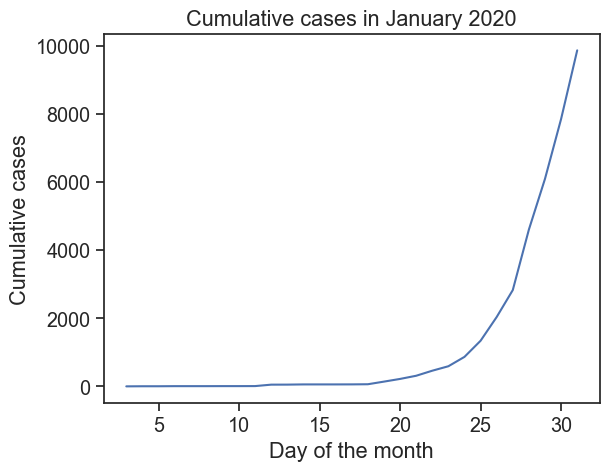

In [ ]:
df_c3=data_process_2(df_c1)
ax_cumulative_cases=sns.lineplot(data=df_c3,x="Date_reported",y="Cumulative_cases")
ax_cumulative_cases.set(title="Cumulative cases in January 2020", xlabel="Day of the month", ylabel="Cumulative cases");

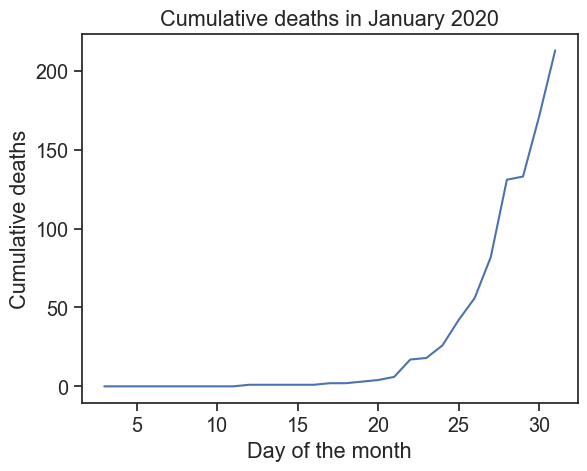

In [ ]:
ax_cumulative_deaths=sns.lineplot(data=df_c3,x="Date_reported",y="Cumulative_deaths")
ax_cumulative_deaths.set(title="Cumulative deaths in January 2020", xlabel="Day of the month", ylabel="Cumulative deaths");

### Cumulative COVID Statistics VS Flight Data

In the first graph both delay spikes are very similar in size. There was an  increase is roughly from 1-7% in cancellations and 9-25% in delays. Since both spikes are of similar size we can assume similar flights were delayed but can not confirm until further research is done.

We can confirm that delays in arrivals and departures are closely linked. We can see that before and leading upto a spike there is generally a greater number of delayed arrivals whereas after the spike in delays when recovering there is a greater delay in departures. This goes for nearly all days except the 18th. This could be due to the fact that airports were more carful with arriving planes to prevent the spread of COVID. However, overall we can say that nearly all flights that were delayed at departure had a delay in arrival due to the idea that on a average the time to fly between two fixed locations is constant within a given gap of time.

We can also gather that the day with the highest percentage of delays was the 11th with arrival delays surpasing 30%. Within the month of January the 11th was the most chaotic is US airports.

The cumulative cases of COVID-19 and death due to the virus has an expoential curve. Yet clearly the delays in flights are not expoential but constantly varying. this proves that there is trial and improvement in the attempt to reduce the number of delays and cacellations while adapting to the evergrowing situation.

We can also gather that from the 12th the reported cases and deaths started growing which is at the peek of the first spike.

  DAY_OF_WEEK  perctentage_of_flights_cancelled  \
0      Monday                          0.690626   
1     Tuesday                          0.604092   
2   Wednesday                          0.393599   
3    Thursday                          0.516031   
4      Friday                          2.661542   
5    Saturday                          2.770147   
6      Sunday                          0.512063   

   perctentage_of_flights_dealyed_on_departure  \
0                                    14.223986   
1                                    10.449611   
2                                    10.238742   
3                                    13.937652   
4                                    17.850538   
5                                    21.756716   
6                                    14.913510   

   perctentage_of_flights_dealyed_on_arrival  
0                                  14.149947  
1                                  10.526590  
2                                  10.242874  
3 

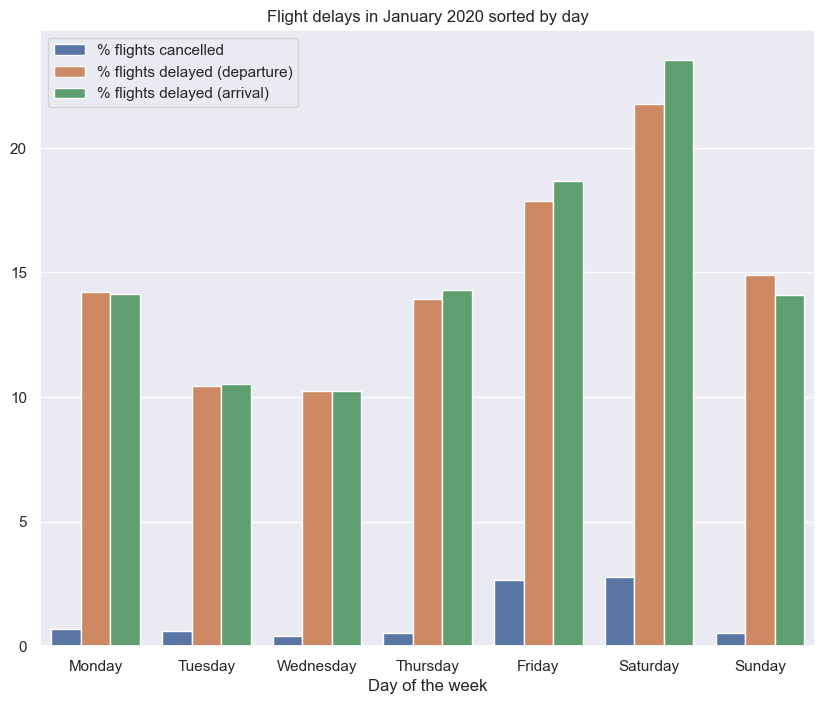

In [ ]:
df5=weekly(df2)
sns.set(rc={"figure.figsize":(10,8)})
ax_day_plot2=sns.barplot(data=df5, x ="DAY_OF_WEEK",y="flights %" , hue="days")
ax_day_plot2.set(title="Flight delays in January 2020 sorted by day", xlabel="Day of the week", ylabel='');
t = plt.legend().get_texts()
t[0].set_text('% flights cancelled')
t[1].set_text('% flights delayed (departure)')
t[2].set_text('% flights delayed (arrival)')

From this bar plot we can see that there is a great percentage of cancellations and delays on Saturdays. Saturday is also the day where the least number of flights were flown. We can see that getting closer to the weekend (Friday, Saturday, Sunday) the number of flights cancelled and delayed increase. This could be because to contain the spread of COVID-19 airports cancelled a greater deal of flights that would likely have tourists. As a note this is as a percentage, therefore, it takes into condiseration that some day may have more flights.